In [60]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tabulate import tabulate
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib

### 数据读取
- json为地图数据 europe.geojson
- csv为电池厂数据 gigaEurope.csv

In [61]:
# Load China GeoJSON data
europe_map = gpd.read_file('./data/europe.geojson')

# Load CSV data
gigaEurope = pd.read_csv('./data/gigaEurope.csv')

print("Original CSV data:")
# print()
gigaEurope.head()

Original CSV data:


,Manufacturer,Manufacturer HQ,Battery OEM,Battery OEM HQ,Factory Region,Country,City,Unique ID (C_E_F),Status,Capacity_Max,...,2029,2030,Chemistry,Format,Latitude,Longitude,CountryZH,Investment,Source,Comment
0,Samsung SDI Battery Systems,South Korea,Samsung SDI,South Korea,Europe,Austria,Graz,Samsung SDI_Austria_Graz,Operational,NaN,...,NaN,NaN,NMC,Prismatic,47.070714,15.439504,奥地利,NaN,https://www.kleinezeitung.at/wirtschaft/559108...,这是一个研发公司
1,ABEE,Belgium,ABEE,Belgium,Europe,Belgium,Seneffe-Manage,ABEE_Belgium_Seneffe-Manage,Announced,3.0,...,NaN,3.0,NaN,NaN,50.510693,4.245775,比利时,43.7,NaN,NaN
2,MES,Czech,MES,Czech,Europe,Czech,Horni Sucha,MES_Czech_Horni Sucha,Under Construction,15.0,...,15.0,15.0,NaN,Prismatic,49.797967,18.442058,捷克,64.8,NaN,NaN
3,Finnish Minerals,Finland,Finnish Minerals,Finland,Europe,Finland,Kotka,Finnish Minerals_Finland_Kotka,Announced,40.0,...,NaN,NaN,NaN,NaN,60.437770,26.774329,芬兰,NaN,https://www.mineralsgroup.fi/topical/news/finn...,"In cell plant projects, the investment cost of..."
4,Freyr,Norway,Freyr,Norway,Europe,Finland,Vaasa,Freyr_Finland_Vaasa,Announced,NaN,...,NaN,NaN,NaN,NaN,63.068271,20.976112,芬兰,NaN,https://www.electrive.com/2021/08/12/freyr-con...,NaN


#### 省份 vs 产能

In [62]:
# Aggregate data by Country
def aggregated_province_sorted(Capacity):
    # Capacity = 'Capacity_2030'
    aggregated_data = gigaEurope.groupby(['Country','CountryZH'])[Capacity].sum().reset_index()
    # aggregated_data = gigaEurope.groupby('Country')[Capacity].sum().reset_index()
    aggregated_province_sorted = aggregated_data.sort_values(by=Capacity, ascending=False)
    # Display the aggregated data
    # print("\nAggregated Data by Province:")
    # print(aggregated_province_sorted)
    return aggregated_province_sorted

aggregated_province_sorted("Capacity_Max")

,Country,CountryZH,Capacity_Max
5,Germany,德国,646.2
7,Hungary,匈牙利,319.9
19,Sweden,瑞典,295.0
23,United Kingdom,英国,228.5
18,Spain,西班牙,180.0
4,France,法国,169.5
11,Norway,挪威,146.0
12,Poland,波兰,129.0
8,Italy,意大利,93.0
16,Serbia,塞尔维亚,80.0


#### 地图绘制

In [117]:
# 聚合：把工厂数据和地图数据merged到一起
def merged_data(aggregated_data_sorted,Capacity):
# Merge GeoJSON with aggregated data
    merged_data = europe_map.merge(aggregated_data_sorted, how='left', left_on='NAME', right_on='Country')

    # Set 'Country' to be the same as 'name'
    merged_data['Country'] = merged_data['Country'].fillna(merged_data['NAME'])

    # Replace NaN values in 'Capacity_2030' with 0
    merged_data[Capacity] = merged_data[Capacity].fillna(-1)
    return merged_data
    # merged_data.head()

# aggregated_data = aggregated_data_sorted("Capacity_2030")
merged_data(aggregated_province_sorted("2030"),"2030").head(10)

,FID,FIPS,ISO2,ISO3,UN,NAME,AREA,POP2005,REGION,SUBREGION,LON,LAT,geometry,Country,CountryZH,2030
0,0.0,AJ,AZ,AZE,31,Azerbaijan,8260,8352021,142,145,47.395,40.430,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39...",Azerbaijan,NaN,-1.0
1,0.0,AL,AL,ALB,8,Albania,2740,3153731,150,39,20.068,41.143,"POLYGON ((19.43621 41.02107, 19.45055 41.06000...",Albania,NaN,-1.0
2,0.0,AM,AM,ARM,51,Armenia,2820,3017661,142,145,44.563,40.534,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40...",Armenia,NaN,-1.0
3,0.0,BK,BA,BIH,70,Bosnia and Herzegovina,5120,3915238,150,39,17.786,44.169,"POLYGON ((17.64984 42.88908, 17.57853 42.94382...",Bosnia and Herzegovina,NaN,-1.0
4,0.0,BU,BG,BGR,100,Bulgaria,11063,7744591,150,151,25.231,42.761,"POLYGON ((27.87917 42.84110, 27.89500 42.80250...",Bulgaria,NaN,-1.0
5,0.0,CY,CY,CYP,196,Cyprus,924,836321,142,145,33.219,35.043,"POLYGON ((33.65262 35.35410, 33.71305 35.38194...",Cyprus,NaN,-1.0
6,0.0,DA,DK,DNK,208,Denmark,4243,5416945,150,154,9.264,56.058,"MULTIPOLYGON (((11.51389 54.82972, 11.56444 54...",Denmark,NaN,-1.0
7,0.0,EI,IE,IRL,372,Ireland,6889,4143294,150,154,-8.152,53.177,"MULTIPOLYGON (((-9.65639 53.22222, -9.66333 53...",Ireland,NaN,-1.0
8,0.0,EN,EE,EST,233,Estonia,4239,1344312,150,154,25.793,58.674,"MULTIPOLYGON (((23.99083 58.10000, 23.97805 58...",Estonia,NaN,-1.0
9,0.0,AU,AT,AUT,40,Austria,8245,8291979,150,155,14.912,47.683,"POLYGON ((13.83361 48.77361, 13.85806 48.77055...",Austria,奥地利,0.0


/var/folders/mm/ws64ts1j4vj4yjq605hnx32w0000gn/T/ipykernel_43893/4205866380.py:16: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  merged_data2.plot(column=Capacity, color='#c9c8c7', linewidth=0.1, ax=ax, edgecolor='0', legend=True)


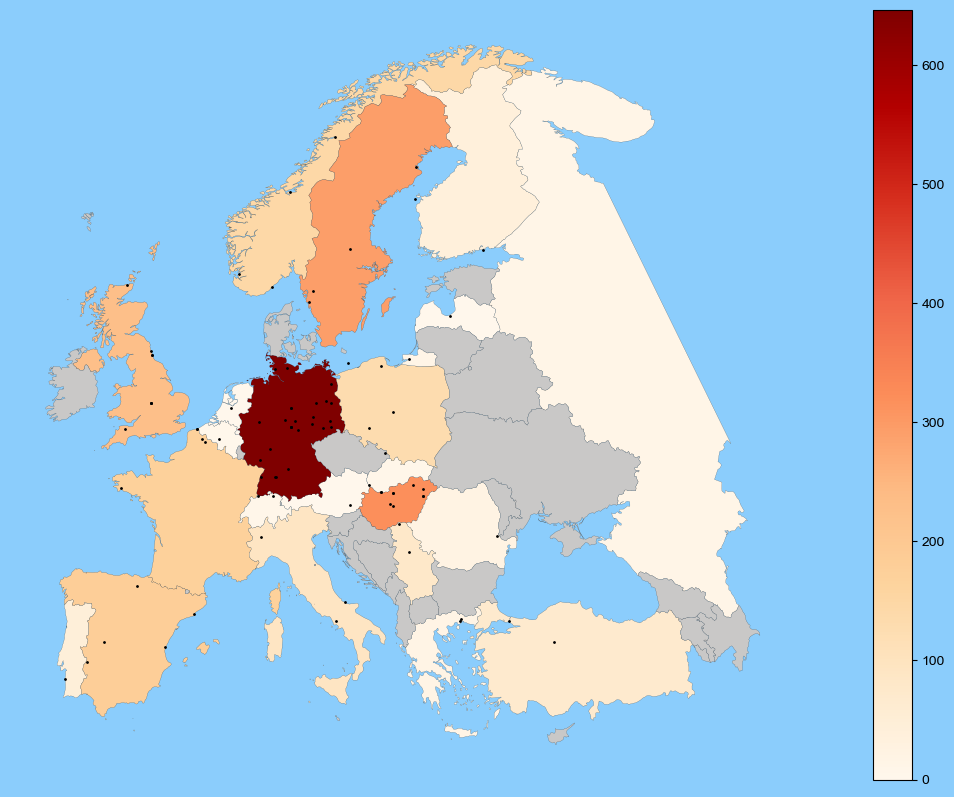

In [119]:
def plot_graph(Capacity,merged_data):
    # Create a GeoDataFrame for gigafactories
    gigafactories_geo = gpd.GeoDataFrame(gigaEurope, 
                                     geometry=gpd.points_from_xy(gigaEurope['Longitude'], gigaEurope['Latitude']),
                                     crs='EPSG:4326')  # Assuming WGS 84 coordinate system
    # Plot the map with color scale
    year = ''.join([c for c in Capacity if c.isdigit()])
    fig, ax = plt.subplots(1, 1, figsize=(20, 10))
    # Set background color
    fig.set_facecolor('#8bcdfc')
    ax.set_axis_off()

    merged_data1 = merged_data[merged_data[Capacity] >= 0]
    merged_data2 = merged_data[merged_data[Capacity] < 0]
    merged_data1.plot(column=Capacity, cmap='OrRd', linewidth=0.1, ax=ax, edgecolor='0', legend=True)
    merged_data2.plot(column=Capacity, color='#c9c8c7', linewidth=0.1, ax=ax, edgecolor='0', legend=True)

    # 电池厂标注（点）
    gigafactories_geo.plot(ax=ax, color='black', markersize=1, label='Gigafactories')
    # Customize plot
    # ax.set_title(year+'年锂电池产能分布', fontproperties='Arial Unicode MS')
    legend = ax.get_legend()
    # Show the plot

    plt.show()


Capacity1 = "Capacity_Max"
Capacity2 = "2023"
# aggregated_data_sorted = aggregated_data_sorted(Capacity)
# merged_data = merge_data(aggregated_data_sorted(Capacity),Capacity)
# !!notice：function嵌套
plot_graph(Capacity1,merged_data(aggregated_province_sorted(Capacity1),Capacity1))
# plot_graph(Capacity2,merged_data(aggregated_province_sorted(Capacity2),Capacity2))

In [65]:
# def plot_graph(Capacity,merged_data):
#     # Create a GeoDataFrame for gigafactories
#     gigafactories_geo = gpd.GeoDataFrame(gigafactoriesChina, 
#                                      geometry=gpd.points_from_xy(gigafactoriesChina['Longitude'], gigafactoriesChina['Latitude']),
#                                      crs='EPSG:4326')  # Assuming WGS 84 coordinate system
#     # Plot the map with color scale
#     year = ''.join([c for c in Capacity if c.isdigit()])
#     fig, ax = plt.subplots(1, 1, figsize=(10, 5))
#     # Set background color
#     fig.set_facecolor('#8bcdfc')
#     ax.set_axis_off()
#     merged_data.plot(column=Capacity, cmap='OrRd', linewidth=0.1, ax=ax, edgecolor='0', legend=True)

#     # Load a custom icon from a PNG file
#     icon_path = './data/Battery.png'  # Replace with the path to your PNG file
#     icon_img = plt.imread(icon_path)

#     # Adjust the size of the icon by changing the zoom factor
#     zoom_factor = 0.02  # Adjust as needed
#     imagebox = OffsetImage(icon_img, zoom=zoom_factor)


#     # Add custom icon as a marker for gigafactories
#     for x, y, label in zip(gigafactories_geo.geometry.x, gigafactories_geo.geometry.y, gigafactories_geo['CompanyName']):
#         ab = AnnotationBbox(imagebox, (x, y), frameon=False, xycoords='data', boxcoords="data", pad=0)
#         ax.add_artist(ab)
#         ## 标注出公司名
#         # ax.annotate(label, (x, y), xytext=(5, 5), textcoords='offset points', fontsize=8, color='black', fontproperties='Arial Unicode MS')


#     # 电池厂标注（点）
#     # gigafactories_geo.plot(ax=ax, color='black', markersize=1, label='Gigafactories')
#     # Customize plot
#     # ax.set_title(year+'年锂电池产能分布', fontproperties='Arial Unicode MS')
#     # legend = ax.get_legend()
#     # Show the plot

#     plt.show()

In [66]:

# def plot_graph3(capacity_column, aggregated_data):
#     # Create a GeoDataFrame for gigafactories
#     gigafactories_geo = gpd.GeoDataFrame(gigafactoriesChina, 
#                                          geometry=gpd.points_from_xy(gigafactoriesChina['Longitude'], gigafactoriesChina['Latitude']),
#                                          crs='EPSG:4326')  # Assuming WGS 84 coordinate system
    
#     # Group by city and sum the capacity
#     grouped_data = aggregated_data.groupby(['city', 'Latitude', 'Longitude'])[capacity_column].sum().reset_index()

#     # Normalize the capacity for markersize
#     max_capacity = grouped_data[capacity_column].max()
#     min_capacity = grouped_data[capacity_column].min()
#     normalized_capacity = (grouped_data[capacity_column] - min_capacity) / (max_capacity - min_capacity)

#     # Scale the normalized capacity to the range [1, 10]
#     markersize = 1 + normalized_capacity * 9

#     # Plot the map with color scale
#     year = ''.join([c for c in capacity_column if c.isdigit()])
#     fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    
#     # Set background color
#     fig.set_facecolor('#8bcdfc')
#     ax.set_axis_off()
    
#     # Plot with markersize based on capacity
#     ax.scatter(grouped_data['Longitude'], grouped_data['Latitude'], s=markersize, c=grouped_data[capacity_column],
#                cmap='OrRd', edgecolors='black', linewidth=0.5, alpha=0.8)

#     # 电池厂标注（点）
#     gigafactories_geo.plot(ax=ax, color='black', markersize=1, label='Gigafactories')
    
#     # Customize plot
#     ax.set_title(f'{year}年锂电池产能分布', fontproperties='Arial Unicode MS')
#     legend = ax.get_legend()
#     legend.set_title(capacity_column)
    
#     # Show the plot
#     plt.show()

# # Usage
# Capacity1 = "Capacity_2030"
# plot_graph3(Capacity1, aggregated_province_sorted(Capacity1))


#### 城市排名

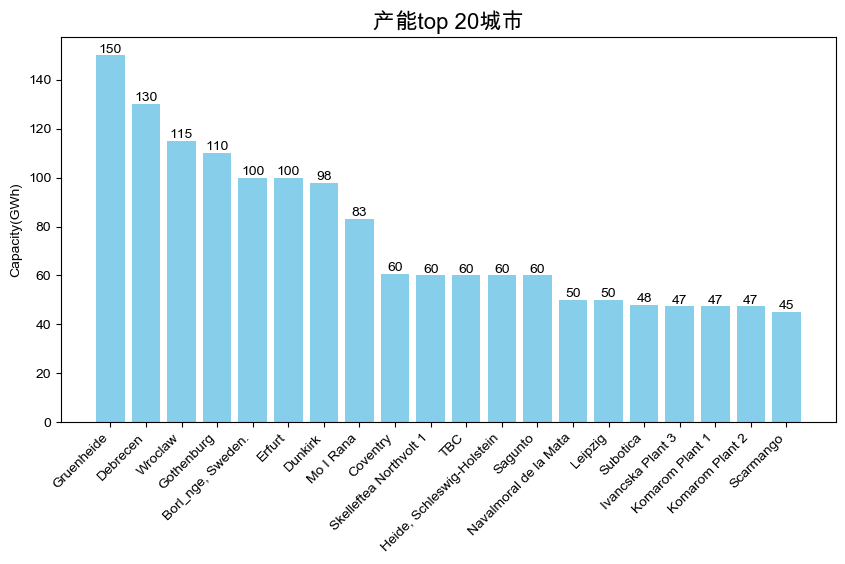

In [67]:
# Group by 'city' and calculate the sum of capacity
aggregated_by_city = gigaEurope.groupby('City')['Capacity_Max'].sum().reset_index()

# Sort the data by descending order of capacity
aggregated_by_city_sorted = aggregated_by_city.sort_values(by='Capacity_Max', ascending=False)

# Select the top 20 cities
top_20_cities = aggregated_by_city_sorted.head(20)

# Calculate the total capacity of all cities
total_capacity = aggregated_by_city_sorted['Capacity_Max'].sum()

# Plot the bar chart
plt.figure(figsize=(10, 5))
bars = plt.bar(top_20_cities['City'], top_20_cities['Capacity_Max'], color='skyblue')
# plt.xlabel('city', fontproperties='Arial Unicode MS')  # Arial Unicode MS is a font that supports a wide range of characters
plt.ylabel('Capacity(GWh)', fontproperties='Arial Unicode MS')
plt.title('产能top 20城市', fontproperties='Arial Unicode MS',fontsize=16)
plt.xticks(rotation=45, ha='right', fontproperties='Arial Unicode MS')  # Rotate x-axis labels for better readability

# Annotate each bar with the ratio
for bar in bars:
    # ratio = bar.get_height() / total_capacity # f'{ratio:.2%}'"]
    value = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.0f}', ha='center', va='bottom',fontsize = 10)

# Show the bar chart
plt.show()

# print(aggregated_by_city_sorted)

In [68]:
# Group by 'city' and calculate the sum of capacity, as well as the average of latitude and longitude
aggregated_by_city = gigaEurope.groupby('City').agg({
    '2030': 'sum',
    'Latitude': 'mean',  # Use 'mean' to calculate the average latitude for each city
    'Longitude': 'mean'  # Use 'mean' to calculate the average longitude for each city
}).reset_index()

# Sort the data by descending order of capacity
aggregated_by_city_sorted = aggregated_by_city.sort_values(by='2030', ascending=False)

aggregated_by_city_sorted.head(20)


,City,2030,Latitude,Longitude
10,Debrecen,130.0,47.530150,21.625689
79,Wroclaw,115.0,51.107885,17.038538
25,Gothenburg,110.0,57.707233,11.967017
17,Erfurt,100.0,50.977797,11.028736
28,Gruenheide,100.0,52.424021,13.820434
44,Mo I Rana,83.0,66.313712,14.141975
29,"Heide, Schleswig-Holstein",60.0,54.194846,9.092901
60,Skelleftea Northvolt 1,60.0,64.734329,21.086904
45,Navalmoral de la Mata,50.0,39.896193,-5.549786
14,Dunkirk,50.0,51.034368,2.376776


#### 根据城市排名+省份排名，用GeoDataFrame画地图，实现城市bubble

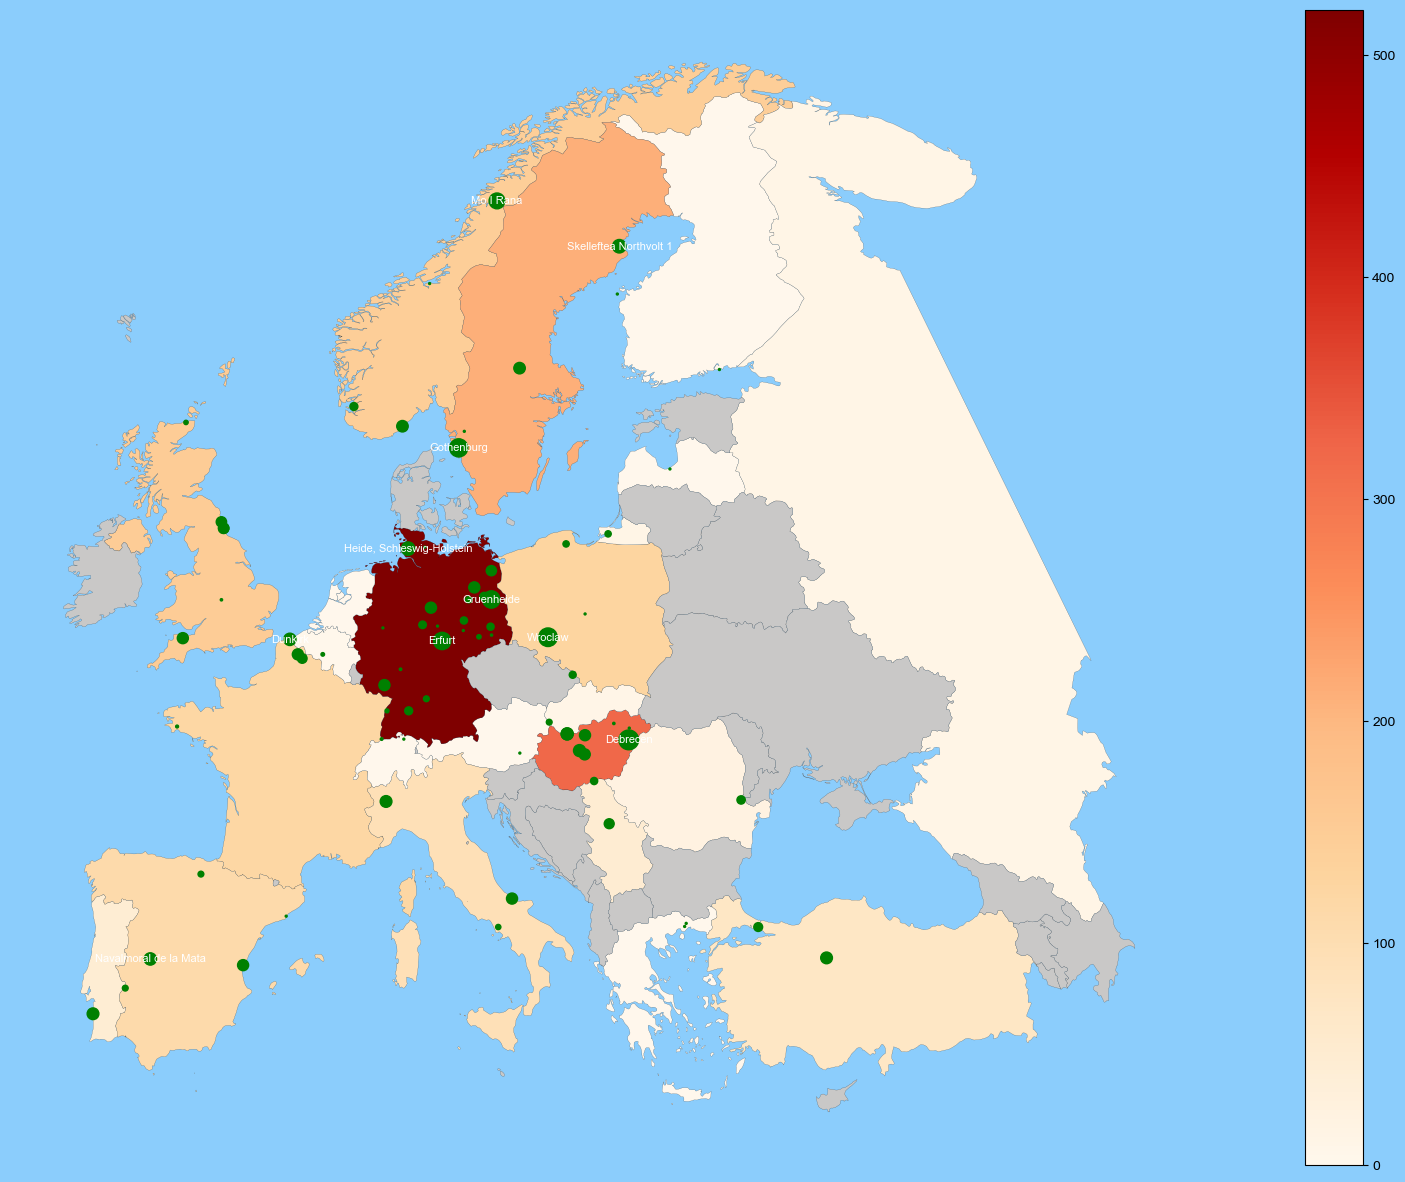

In [121]:
def plot_map_province_city(Capacity,merged_data):
    # Create a GeoDataFrame for gigafactories
    gigafactories_geo = gpd.GeoDataFrame(aggregated_by_city_sorted, 
                                     geometry=gpd.points_from_xy(aggregated_by_city_sorted['Longitude'], aggregated_by_city_sorted['Latitude']),
                                     crs='EPSG:4326')  # Assuming WGS 84 coordinate system
    # Plot the map with color scale
    year = ''.join([c for c in Capacity if c.isdigit()])
    fig, ax = plt.subplots(1, 1, figsize=(30, 15))
    # Set background color
    fig.set_facecolor('#8bcdfc')

    # Set transparent background color
    # fig.patch.set_alpha(0)

    ax.set_axis_off()
    # merged_data.plot(column=Capacity, cmap='OrRd', linewidth=1, ax=ax, edgecolor='0', legend=True)

    merged_data1 = merged_data[merged_data[Capacity] >= 0]
    merged_data2 = merged_data[merged_data[Capacity] < 0]
    merged_data1.plot(column=Capacity, cmap='OrRd', linewidth=0.1, ax=ax, edgecolor='0', legend=True)
    merged_data2.plot(color='#c9c8c7', linewidth=0.1, ax=ax, edgecolor='0', legend=True)
    
    # 电池厂标注（点）
    # gigafactories_geo.plot(ax=ax, color='black', markersize=1, label='Gigafactories')
    
    # Plot gigafactories with markersize based on Capacity
    gigafactories_geo.plot(ax=ax, color='green', markersize=200 * (0.01 + gigafactories_geo[Capacity] / gigafactories_geo[Capacity].max()), label='Gigafactories')
    
    # Add city labels
    for x, y, label in zip(gigafactories_geo.geometry.x, gigafactories_geo.geometry.y, gigafactories_geo['City'].head(10)): # 只显示top20城市
        ax.text(x, y, label, fontsize=8, ha='center', va='center', color='white', fontproperties='Arial Unicode MS')
    

    # Customize plot
    # ax.set_title(year+'年锂电池产能分布', fontproperties='Arial Unicode MS')
    # legend = ax.get_legend()
    # Show the plot

    plt.show()


Capacity1 = "2030"
Capacity2 = "2030"
# aggregated_data_sorted = aggregated_data_sorted(Capacity)
# merged_data = merge_data(aggregated_data_sorted(Capacity),Capacity)
# !!notice：function嵌套
plot_map_province_city(Capacity1,merged_data(aggregated_province_sorted(Capacity1),Capacity1))
# plot_map_province_city(Capacity2,merged_data(aggregated_province_sorted(Capacity2),Capacity2))

#### 省份产能排名柱状图

In [70]:
# # 连续出图
# def plot_bar(Capacity, aggregated_data_sorted,ax):
#     # Plotting the bar chart
#     # plt.figure(figsize=(5, 3))
#     year = ''.join([c for c in Capacity if c.isdigit()])
#     # Select the top 10 provinces
#     top_10_provinces = aggregated_data_sorted(Capacity).head(10)

#     ax.bar(top_10_provinces['Country'], top_10_provinces[Capacity], color='skyblue')
#     ax.set_ylabel(year+'年产能(GWh)', fontproperties='Arial Unicode MS')
#     ax.set_title(year+'年产能省排名', fontproperties='Arial Unicode MS')
#     # ax.tick_params(axis='x', rotation=35, ha='right')
#     ax.tick_params(axis='x', rotation=35)


#     # Set the font name for axis tick labels
#     for tick in ax.get_xticklabels():
#         tick.set_fontname("Arial Unicode MS")



In [71]:
# # Create subplots with a 3x3 layout
# fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# # Flatten the 2D array to simplify indexing
# axes = axes.flatten()

# # Plot each bar chart using the same aggregated_data_sorted
# # Capacities = ["Capacity_2023", "Capacity_2024", "Capacity_2025", "Capacity_2026", "Capacity_2027", "Capacity_2028", "Capacity_2029", "Capacity_2030"]
# Capacities = ["Capacity_Max", "2030"]

# max_y_value = 0

# for i, Capacity in enumerate(Capacities):
#     plot_bar(Capacity, aggregated_province_sorted, axes[i])
#     max_y_value = max(max_y_value, aggregated_province_sorted(Capacity)[Capacity].max())

# # y轴统一
# for ax in axes:
#     ax.set_ylim(0, max_y_value)
# # Adjust layout
# plt.tight_layout()

# # Show the plots
# plt.show()

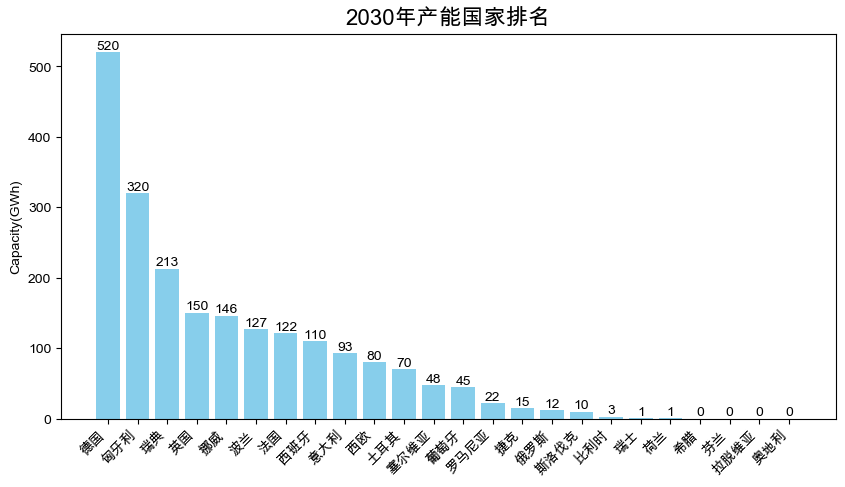

In [72]:
def plot_bar(Capacity, aggregated_province_sorted):
    # Plotting the bar chart
    plt.figure(figsize=(10, 5))

    # Select the top countries
    top_countries = aggregated_province_sorted.sort_values(by=Capacity, ascending=False)

    bars = plt.bar(top_countries['CountryZH'], top_countries[Capacity], color='skyblue')
    
    # Annotate each bar with its value
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.0f}', ha='center', va='bottom',fontsize=10)
    
    # plt.xlabel('Province', fontproperties='Arial Unicode MS')
    plt.ylabel('Capacity(GWh)', fontproperties='Arial Unicode MS')
    plt.title('2030年产能国家排名', fontproperties='Arial Unicode MS',fontsize=16)
    plt.xticks(rotation=45, ha='right', fontproperties='Arial Unicode MS')

    # Show the bar chart
    plt.show()

# Example usage
Capacity = "2030"
# Capacity1 = "2030"
plot_bar(Capacity, aggregated_province_sorted(Capacity))
# plot_bar(Capacity1, aggregated_province_sorted(Capacity1))

#### 化学材料排名饼图

In [73]:
# 不同化学材料产量排名
def aggregated_chemistry_sorted(Capacity):
    # Capacity = 'Capacity_2030'
    aggregated_data = gigaEurope.groupby('Chemistry')[Capacity].sum().reset_index()
    aggregated_chemistry_sorted = aggregated_data.sort_values(by=Capacity, ascending=False)
    # Display the aggregated data
    # print("\nAggregated Data by Province:")
    # print(aggregated_province_sorted)
    return aggregated_chemistry_sorted

aggregated_chemistry_sorted("2030")

,Chemistry,2030
2,NMC,1230.6
0,LFP,417.8
3,NMCA,115.0
1,NM,50.0
4,Other,29.5
5,Unknown,10.5


/var/folders/mm/ws64ts1j4vj4yjq605hnx32w0000gn/T/ipykernel_43893/1980412393.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_chemistry = top_chemistry.append({'Chemistry': 'Other', Capacity: other_value}, ignore_index=True)


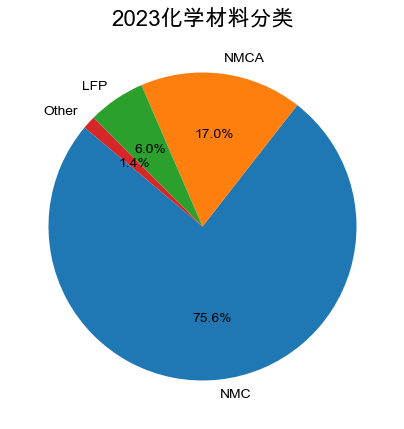

/var/folders/mm/ws64ts1j4vj4yjq605hnx32w0000gn/T/ipykernel_43893/1980412393.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_chemistry = top_chemistry.append({'Chemistry': 'Other', Capacity: other_value}, ignore_index=True)


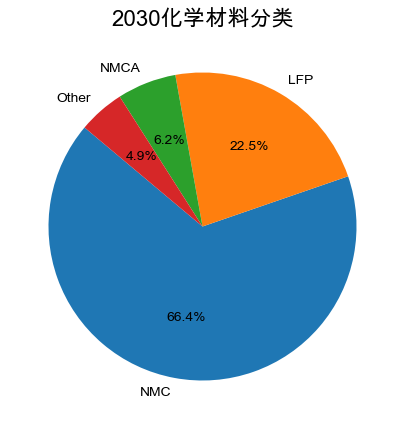

In [74]:
def plot_bar_chemistry(Capacity):
    # Get aggregated and sorted data

    year = ''.join([c for c in Capacity if c.isdigit()])
    # Plotting the pie chart
    # plt.figure(figsize=(5, 5))
    # plt.pie(aggregated_chemistry_sorted(Capacity)[Capacity], labels=aggregated_chemistry_sorted(Capacity)['Chemistry'], autopct='%1.1f%%', startangle=140)
    # plt.title(year+'电池材料分类(GWh)', fontproperties='Arial Unicode MS')
    # plt.show()

        # Plotting the modified pie chart
    top_n = 3
    top_chemistry = aggregated_chemistry_sorted(Capacity).head(top_n)
    other_chemistry = aggregated_chemistry_sorted(Capacity).iloc[top_n:]

    # Combine "Other" category
    other_value = other_chemistry[Capacity].sum()
    top_chemistry = top_chemistry.append({'Chemistry': 'Other', Capacity: other_value}, ignore_index=True)

    plt.figure(figsize=(5, 5))
    plt.pie(top_chemistry[Capacity], labels=top_chemistry['Chemistry'], autopct='%1.1f%%', startangle=140)
    plt.title(year+'化学材料分类', fontproperties='Arial Unicode MS',fontsize=16)
    plt.show()

# Example usage
Capacity1 = "2023"
plot_bar_chemistry(Capacity1)

Capacity2 = "2030"
plot_bar_chemistry(Capacity2)

#### 电池format排名饼图

In [75]:
# 电池
def aggregated_format_sorted(Capacity):
    # Capacity = 'Capacity_2030'
    aggregated_data = gigaEurope.groupby('Format')[Capacity].sum().reset_index()
    aggregated_format_sorted = aggregated_data.sort_values(by=Capacity, ascending=False)
    # Display the aggregated data
    # print("\nAggregated Data by Province:")
    # print(aggregated_province_sorted)
    return aggregated_format_sorted

aggregated_format_sorted("2030")

,Format,2030
1,Mixed,671.4
3,Prismatic,642.1
2,Pouch,257.1
0,Cylinder,215.8
5,Unknown,82.0
4,Solid,0.0


/var/folders/mm/ws64ts1j4vj4yjq605hnx32w0000gn/T/ipykernel_43893/3628747997.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_format = top_format.append({'Format': 'Other', Capacity: other_value}, ignore_index=True)


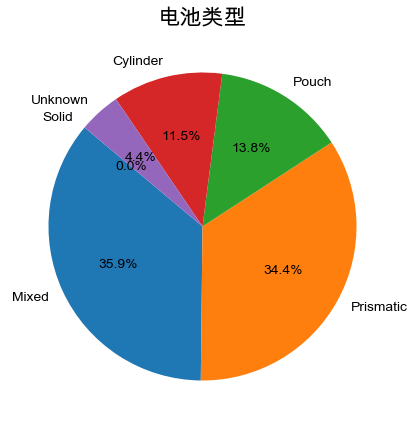

In [76]:
def plot_bar_format(Capacity):
    # Get aggregated and sorted data

    year = ''.join([c for c in Capacity if c.isdigit()])
    # Plotting the pie chart
    # plt.figure(figsize=(5, 5))
    # plt.pie(aggregated_chemistry_sorted(Capacity)[Capacity], labels=aggregated_chemistry_sorted(Capacity)['Chemistry'], autopct='%1.1f%%', startangle=140)
    # plt.title(year+'电池材料分类(GWh)', fontproperties='Arial Unicode MS')
    # plt.show()

        # Plotting the modified pie chart
    top_n = 5
    top_format = aggregated_format_sorted(Capacity).head(top_n)
    other_format = aggregated_format_sorted(Capacity).iloc[top_n:]

    # Combine "Other" category
    other_value = other_format[Capacity].sum()
    top_format = top_format.append({'Format': 'Other', Capacity: other_value}, ignore_index=True)

    plt.figure(figsize=(5, 5))
    plt.pie(aggregated_format_sorted(Capacity)[Capacity], labels=aggregated_format_sorted(Capacity)['Format'], autopct='%1.1f%%', startangle=140)
    plt.title('电池类型', fontproperties='Arial Unicode MS',fontsize=16)
    plt.show()

# Example usage
# Set the default font globally
matplotlib.rcParams['font.sans-serif'] = ['Arial Unicode MS']
Capacity = "2030"
plot_bar_format(Capacity)

#### 电池厂status(GWh)

In [77]:
# Aggregate data by status
def aggregated_status_sorted(Capacity):
    # Capacity = 'Capacity_2030'
    aggregated_data = gigaEurope.groupby('Status')[Capacity].sum().reset_index()
    aggregated_status_sorted = aggregated_data.sort_values(by=Capacity, ascending=False)
    # Display the aggregated data
    # print("\nAggregated Data by Province:")
    # print(aggregated_province_sorted)
    return aggregated_status_sorted

aggregated_status_sorted("2030")

,Status,2030
2,Operational,867.0
3,Under Construction,705.4
0,Announced,490.0
1,Canceled,34.0
4,Unknown,0.0


#### 电池厂status（个）

In [78]:
status_counts = gigaEurope['Status'].value_counts()
status_counts

Operational           37
Announced             28
Under Construction    21
Canceled               1
Unknown                1
Name: Status, dtype: int64

#### 电池公司产能排名

In [128]:
# 企业排名
def aggregated_CompanyName_sorted(Capacity):
    total_capacity = gigaEurope[Capacity].sum()

    # aggregated_data = gigaEurope.groupby('Manufacturer')[Capacity].sum().reset_index()
    aggregated_data = gigaEurope.groupby(['Manufacturer', 'CountryZH'])[Capacity].sum().reset_index()

    
    aggregated_data['CapacityRatio'] = aggregated_data[Capacity] / total_capacity
    # Format the 'CapacityRatio' column as percentages
    aggregated_data['CapacityRatio'] = aggregated_data['CapacityRatio'].apply(lambda x: f'{x:.2%}')

    # aggregated_data['CountryZH'] = aggregated_data['CountryZH']
    aggregated_companyName_sorted = aggregated_data.sort_values(by=Capacity, ascending=True)
    # Display the aggregated data
    # print("\nAggregated Data by Province:")
    # print(aggregated_province_sorted)
    return aggregated_companyName_sorted

aggregated_CompanyName_sorted("2024").head(20)

,Manufacturer,CountryZH,2024,CapacityRatio
0,ABEE,比利时,0.0,0.00%
30,Ford / SK On / Koc Holding JV,土耳其,0.0,0.00%
31,Freyr,芬兰,0.0,0.00%
33,GSR Capital,瑞典,0.0,0.00%
70,TATA,英国,0.0,0.00%
38,InoBat / Gotion JV,塞尔维亚,0.0,0.00%
39,Italvolt,意大利,0.0,0.00%
79,West Midlands,英国,0.0,0.00%
43,Listrom,德国,0.0,0.00%
46,Mercedes,德国,0.0,0.00%


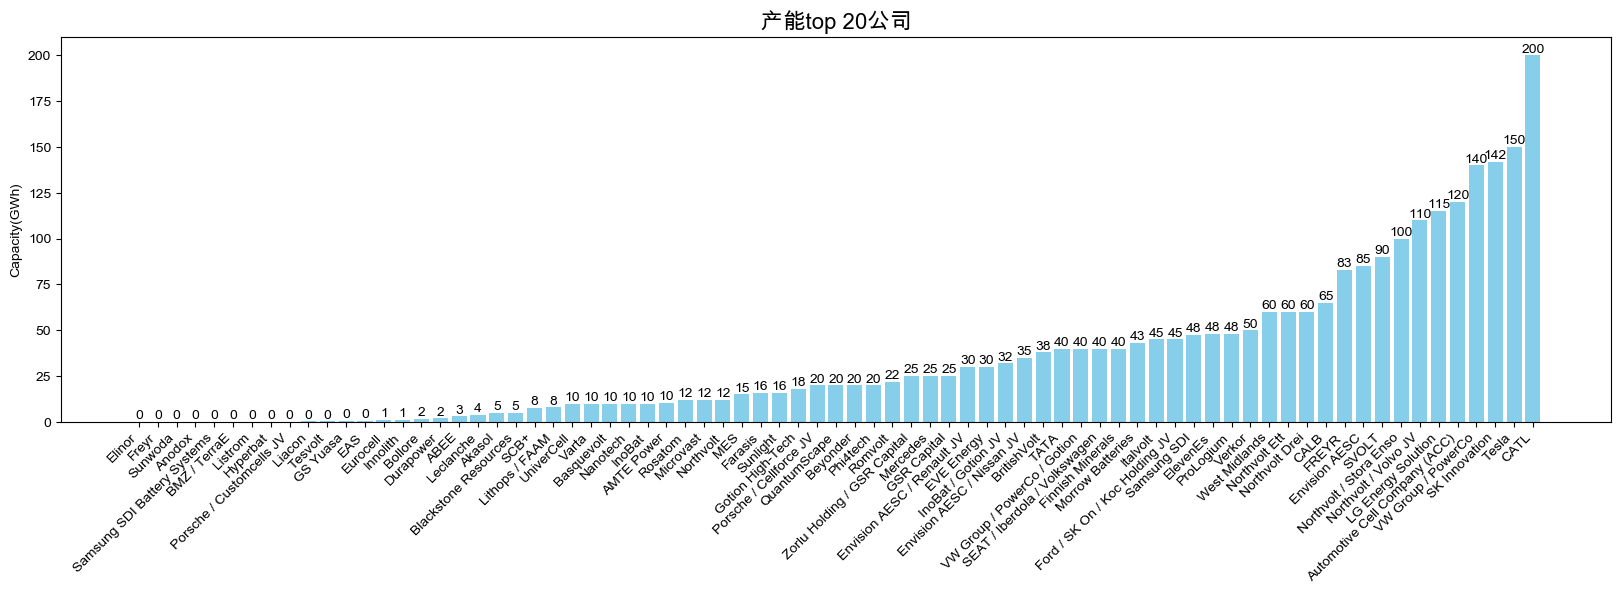

In [80]:
def plot_bar_company_name(Capacity):
    # Get aggregated and sorted data
    aggregated_data = aggregated_CompanyName_sorted(Capacity)

    # Plotting the bar chart
    plt.figure(figsize=(20, 5))
    bars = plt.bar(aggregated_data['Manufacturer'], aggregated_data[Capacity], color='skyblue')

    # Annotate each bar with its value
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.0f}', ha='center', va='bottom',fontsize=10)

    # plt.xlabel('Company Name', fontproperties='Arial Unicode MS')
    plt.ylabel('Capacity(GWh)', fontproperties='Arial Unicode MS')
    plt.title('产能top 20公司', fontproperties='Arial Unicode MS',fontsize=16)
    plt.xticks(rotation=45, ha='right', fontproperties='Arial Unicode MS')
    # plt.tight_layout()

    # Show the bar chart
    plt.show()

# Example usage
Capacity = "Capacity_Max"
plot_bar_company_name(Capacity)


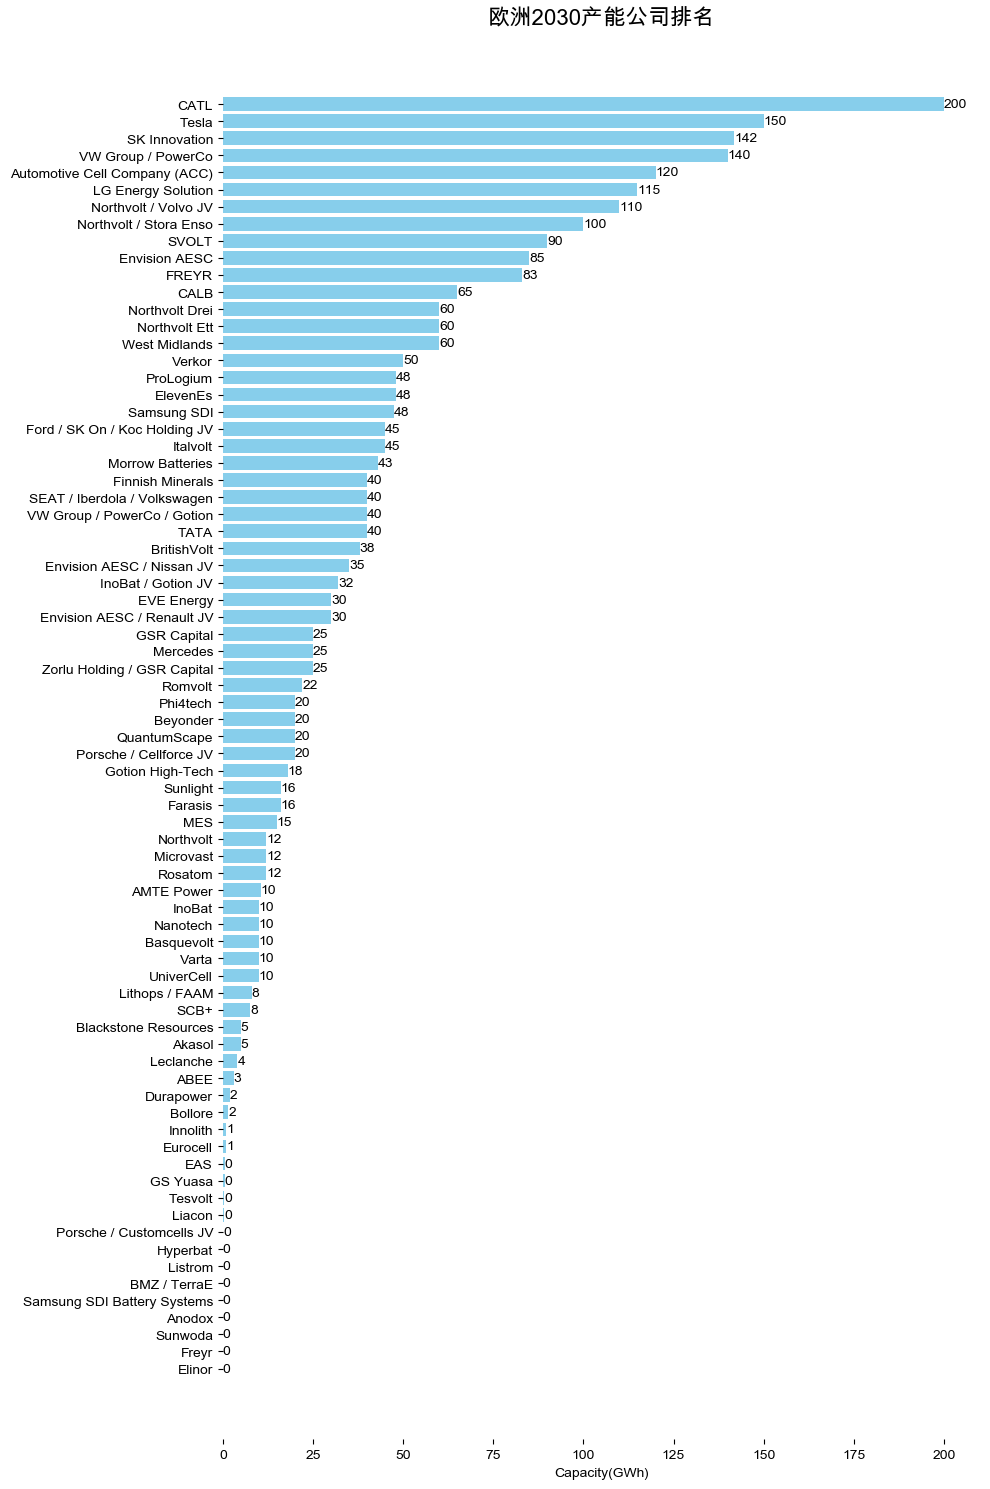

In [123]:
def plot_bar_company_name(Capacity):
    # Get aggregated and sorted data
    aggregated_data = aggregated_CompanyName_sorted(Capacity)

    # Plotting the bar chart
    plt.figure(figsize=(10, 15))  # Adjust the figure size based on the rotated chart
    bars = plt.barh(aggregated_data['Manufacturer'], aggregated_data[Capacity], color='skyblue')  # Use barh for horizontal bars

    # Annotate each bar with its value
    for bar in bars:
        xval = bar.get_width()  # Adjusted to get_width() for horizontal bars
        plt.text(xval, bar.get_y() + bar.get_height() / 2, f'{xval:.0f}', va='center', ha='left', fontsize=10)

    # plt.xlabel('Company Name', fontproperties='Arial Unicode MS')
    plt.xlabel('Capacity(GWh)', fontproperties='Arial Unicode MS')  # Adjusted to xlabel for horizontal bars
    plt.title('欧洲2030产能公司排名', fontproperties='Arial Unicode MS', fontsize=16)
    plt.yticks(rotation=0, fontproperties='Arial Unicode MS')  # Adjusted to yticks for horizontal bars


    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    # plt.gca().invert_yaxis()

    plt.tight_layout()

    # Show the bar chart
    plt.show()

# Example usage
Capacity = "Capacity_Max"
# Capacity = "2030"
plot_bar_company_name(Capacity)


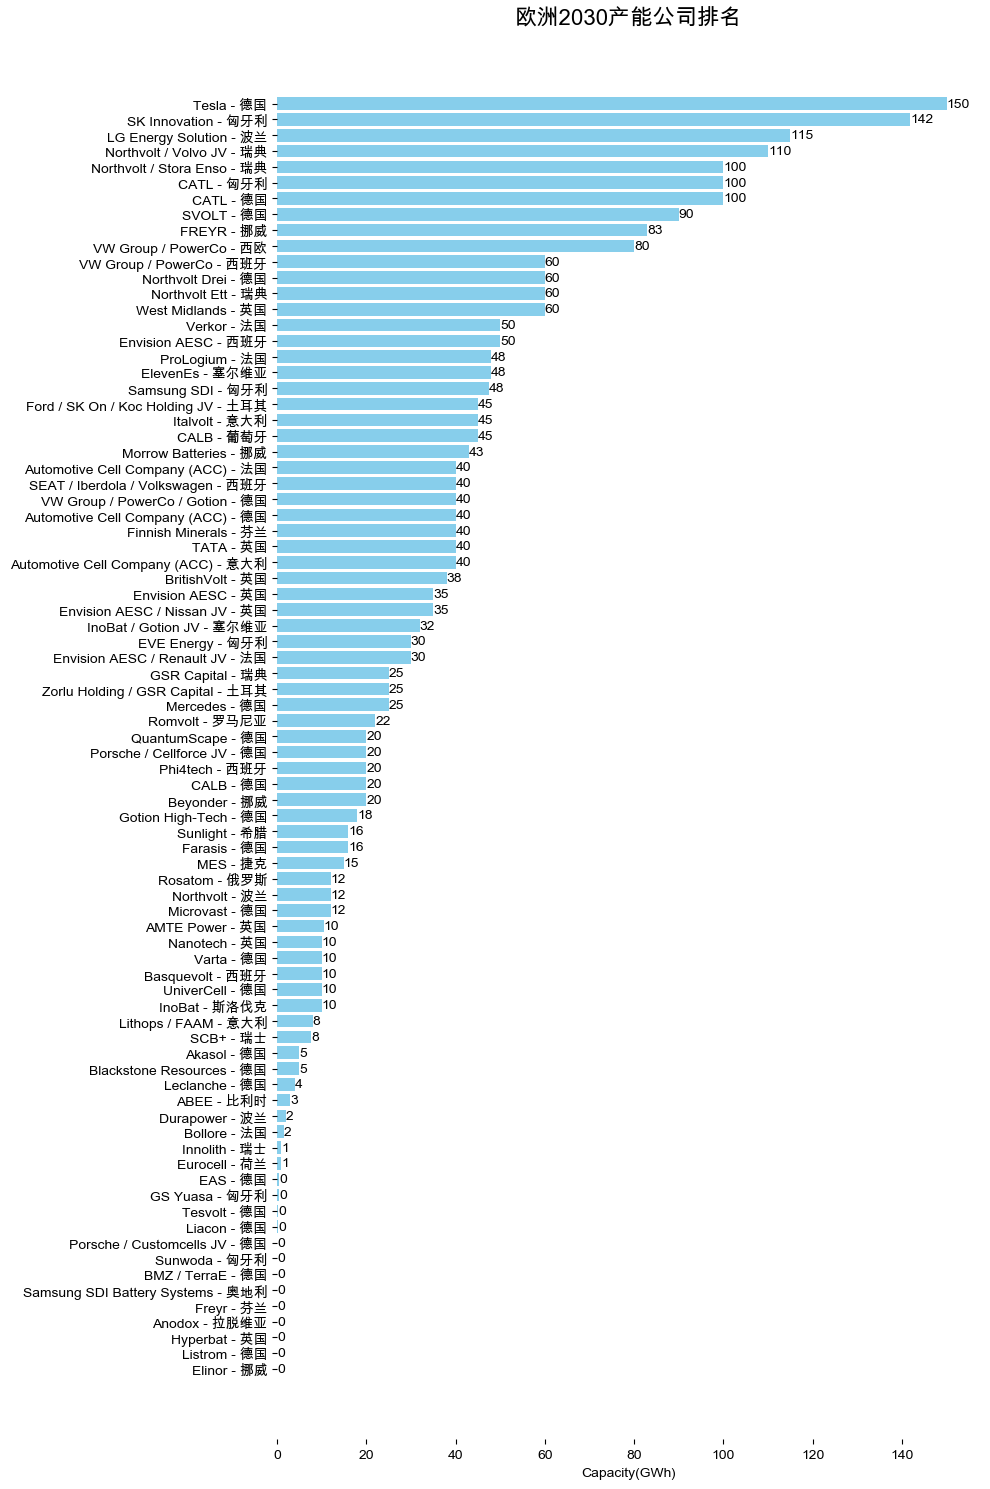

In [129]:
def plot_bar_company_name(Capacity):
    # Get aggregated and sorted data
    aggregated_data = aggregated_CompanyName_sorted(Capacity)

    # Concatenate "Manufacturer" and "CountryZh" for y-axis labels
    y_labels = [f'{manufacturer} - {country}' for manufacturer, country in zip(aggregated_data['Manufacturer'], aggregated_data['CountryZH'])]

    # Plotting the bar chart
    plt.figure(figsize=(10, 15))  # Adjust the figure size based on the rotated chart
    bars = plt.barh(y_labels, aggregated_data[Capacity], color='skyblue')  # Use barh for horizontal bars

    # Annotate each bar with its value
    for bar in bars:
        xval = bar.get_width()  # Adjusted to get_width() for horizontal bars
        plt.text(xval, bar.get_y() + bar.get_height() / 2, f'{xval:.0f}', va='center', ha='left', fontsize=10)

    # plt.xlabel('Company Name', fontproperties='Arial Unicode MS')
    plt.xlabel('Capacity(GWh)', fontproperties='Arial Unicode MS')  # Adjusted to xlabel for horizontal bars
    plt.title('欧洲2030产能公司排名', fontproperties='Arial Unicode MS', fontsize=16)
    plt.yticks(rotation=0, fontproperties='Arial Unicode MS')  # Adjusted to yticks for horizontal bars

    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    # plt.gca().invert_yaxis()

    plt.tight_layout()

    # Show the bar chart
    plt.show()

# Example usage
Capacity = "Capacity_Max"
# Capacity = "2030"
plot_bar_company_name(Capacity)


#### 数据分析
- 寻找Max Capacity大于2023年Capacity的公司数量，which代表了有后续产能增加

In [ ]:
filtered_rows = gigaEurope[gigaEurope['Capacity_Max'] > gigaEurope['2023']]

filtered_rows['Manufacturer'].count()

42

In [ ]:
# # Group by 'Province'
# grouped_data = gigaEurope.groupby('Country')

# # Print each province's data

# # Print each province's data using tabulate
# # for province, province_data in grouped_data:
# #     print(f"\nProvince: {province}")
# #     print(tabulate(province_data, headers='keys', tablefmt='pretty'))
# modified_tables = []

# # Print each province's data using tabulate
# for province, province_data in grouped_data:
#     # Add a new column 'CompanyCount' with the count of companies in each province
#     province_data['Manufacturer'] = len(province_data)
    
#     # Order the table by MaxCapacity
#     province_data = province_data.sort_values(by='Capacity_Max', ascending=False)
    
#     # Drop the added 'CompanyCount' column after printing
#     # province_data_for_print = province_data.drop(columns=['CompanyCount'])
    
#     # Create the table with tabulate
#     table = tabulate(province_data_for_print, headers='keys', tablefmt='pretty')
    
#     # Append the modified table to the list
#     modified_tables.append((province, table))

# # Print the modified tables
# for province, table in modified_tables:
#     print(f"\nProvince: {province} - {len(gigaEurope[gigaEurope['Country'] == province])}")
#     print(table)

####  全国产能增长

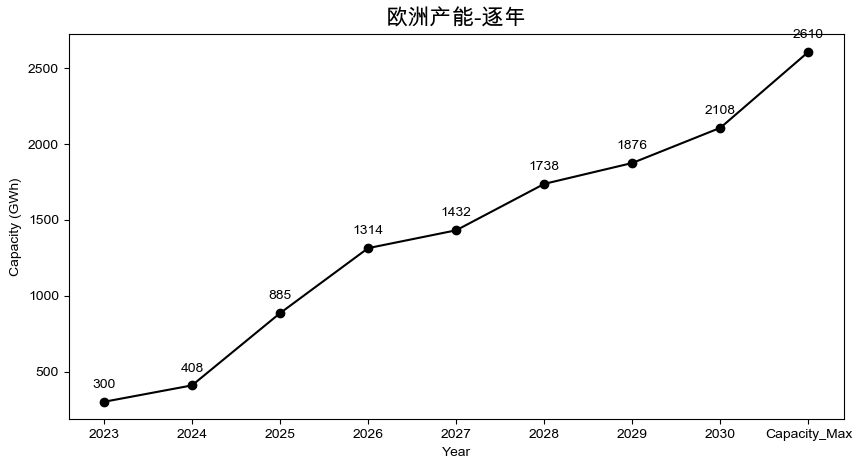

In [86]:

# Extract relevant columns
years = ['2023', '2024', '2025', '2026', '2027', '2028', '2029', '2030', 'Capacity_Max']
sum = gigaEurope[years].sum()

# Extract only the numeric part of the years

# Plot the line chart with updated x-axis labels
plt.figure(figsize=(10, 5))
line = plt.plot(years, sum, marker='o', linestyle='-', color='black')

# Annotate each data point with its value
for i, txt in enumerate(sum):
    # plt.annotate(txt, (numeric_years[i], sum[i]), textcoords="offset points", xytext=(0,10), ha='center')
    plt.annotate(f'{sum[i]:.0f}', (years[i], sum[i]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.title('欧洲产能-逐年', fontproperties='Arial Unicode MS', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Capacity (GWh)')
# plt.grid(True)
plt.show()

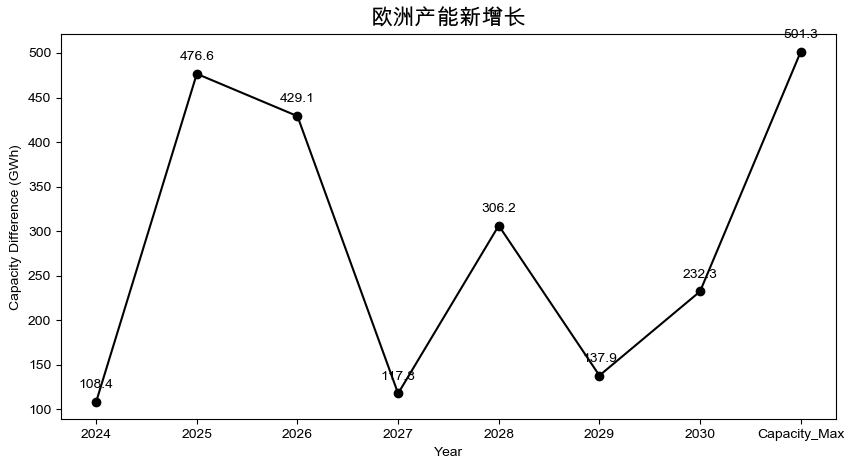

In [92]:

years = ['2023', '2024', '2025', '2026', '2027', '2028', '2029', '2030', 'Capacity_Max']
capacity_data = gigaEurope[years].sum()

# Calculate the differences between consecutive years
capacity_diff = capacity_data.diff()

# Plot the line chart
plt.figure(figsize=(10, 5))
line = plt.plot(capacity_diff.index, capacity_diff.values, marker='o', linestyle='-', color='black')

# Annotate each data point with its value
for i, txt in enumerate(capacity_diff.values):
    plt.annotate(f'{txt:.1f}', (capacity_diff.index[i], capacity_diff.values[i]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.title('欧洲产能新增长', fontproperties='Arial Unicode MS', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Capacity Difference (GWh)')
plt.show()


#### 各省产能增长

IndexError: index 9 is out of bounds for axis 0 with size 9

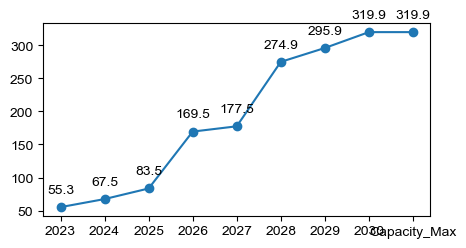

In [89]:
# Assuming gigafactoriesChina is your DataFrame
# Replace it with your actual DataFrame

# Extract relevant columns
years = ['2023', '2024', '2025', '2026', '2027', '2028', '2029', '2030', 'Capacity_Max']

# Extract only the numeric part of the years
# numeric_years = [year.split('_')[1] for year in years]

# Plot line charts for different provinces

def plot_line_province(province):
    # Filter data for the current province
    province_data = gigaEurope[gigaEurope['Country'] == province]
    
    # Aggregate data for the current province
    aggregated_data = province_data[years].sum()

    # Plot the line chart
    plt.figure(figsize=(5, 2.5))
    plt.plot(years, aggregated_data, marker='o', linestyle='-')

    for i, txt in enumerate(gigaEurope):
        plt.annotate(f'{aggregated_data[i]:.1f}', (years[i], aggregated_data[i])
                     , textcoords="offset points", xytext=(0, 10), ha='center',fontsize=10)

    plt.title(province+'产能增长', fontproperties='Arial Unicode MS',fontsize=16)
    plt.xlabel('Year')
    plt.ylabel('Capacity (GWh)')
    # plt.legend()
    # plt.grid(True)
    plt.show()


# plot_line_province("Germany")
plot_line_province("Hungary")
# plot_line_province("安徽省")
# plot_line_province("浙江省")


# plot_line_province("四川省")
# plot_line_province("福建省")
# plot_line_province("江西省")
# plot_line_province("山东省")


IndexError: index 9 is out of bounds for axis 0 with size 9

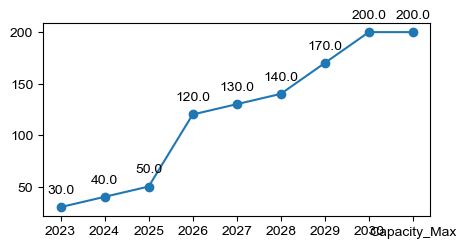

In [ ]:

# Assuming gigafactoriesChina is your DataFrame
# Replace it with your actual DataFrame

# Extract relevant columns
years = ['2023', '2024', '2025', '2026', '2027', '2028', '2029', '2030', 'Capacity_Max']

# Extract only the numeric part of the years
# numeric_years = [year.split('_')[1] for year in years]

# Plot line charts for different provinces

def plot_line_province(CompanyName):
    # Filter data for the current province
    province_data = gigaEurope[gigaEurope['Manufacturer'] == CompanyName]
    
    # Aggregate data for the current Company Name
    aggregated_data = province_data[years].sum()
    
    # Plot the line chart
    plt.figure(figsize=(5, 2.5))
    plt.plot(years, aggregated_data, marker='o', linestyle='-')



    for i, txt in enumerate(gigaEurope):
        plt.annotate(f'{aggregated_data[i]:.1f}', (years[i], aggregated_data[i])
                     , textcoords="offset points", xytext=(0, 10), ha='center',fontsize=10)

    plt.title(CompanyName+'产能增长', fontproperties='Arial Unicode MS')
    plt.xlabel('Year')
    plt.ylabel('Sum of Capacity (GWh)')
    # plt.legend()
    plt.grid(True)
    plt.show()


plot_line_province("CATL")
# plot_line_province("蜂巢能源")
# plot_line_province("比亚迪")
# plot_line_province("力神")
# plot_line_province("中航锂电")

In [ ]:
# # Extract relevant columns
# columns_to_group = ['province', 'city', 'Capacity_2023', 'Capacity_2024', 'Capacity_2025', 'Capacity_2026', 'Capacity_2027', 'Capacity_2028', 'Capacity_2029', 'Capacity_2030','Capacity_Max']

# # Group by Province and City, calculate the sum of capacities
# grouped_data = gigafactoriesChina[columns_to_group].groupby(['province', 'city']).sum().reset_index()

# # Sort by Capacity_2030 in descending order
# grouped_data = grouped_data.sort_values(by='Capacity_Max', ascending=False)

# grouped_data.to_csv('grouped_capacity_by_province_and_city_sorted.csv', index=False,encoding='utf-8-sig')
